In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests
import json
#import plotly.express as px
import sys
sys.path.append('../bgc-analysis')
from  calc_sensor import pH_sbe, o2_sbe
import numpy as np
from datetime import datetime
from db_api import get_cal,get_continuous_one_profile,get_continuous_one_float
from calc_sensor import pH_sbe
import openpyxl

In [79]:
wmo = "8" #UPDATE FOR EACH FLOAT
SN = 1528       #UPDATE FOR EACH FLOAT
whichtest = 'valve' #PICK PUMP OR VALVE
meta = get_cal(wmo)
meta

,CTD_CNDC,CTD_PRES,CTD_TEMP,OPTODE_DOXY,FLUOROMETER_CDOM,FLUOROMETER_CHLA,BACKSCATTERINGMETER_BBP700,SPECTROPHOTOMETER_NITRATE,TRANSISTOR_PH
SENSOR_MAKER,SBE,DRUCK,SBE,SBE,WETLABS,WETLABS,WETLABS,SATLANTIC,SBE
SENSOR_MODEL,SBE41CP_V5.3.5,DRUCK_2900PSIA,SBE41CP_V5.3.5,SBE63_V3.2.2,MCOMS_FLBBCD,MCOMS_FLBBCD,MCOMS_FLBBCD,SUNA_V2,SEAFET
SENSOR_SERIAL_NO,18947,12263199,18947,3419,419,419,419,2068,720-12256
SENSOR_CALIB_DATE,2023-03-12,2023-03-16,2023-03-12,2023-03-08,None,None,None,None,None
COMMENTS,None,None,None,None,,,,None,REF SN: 12246; no calibration date listed; K0:...
PREDEPLOYMENT_CALIB_EQUATION,{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None}
PREDEPLOYMENT_CALIB_COEFFICIENT,"{'G': -1.01677, 'H': 0.1431673, 'I': -0.000169...","{'PA0': 0.2982393, 'PA1': 0.0003909299, 'PA2':...","{'TA0': -0.0008992448, 'TA1': 0.0003029106, 'T...","{'E': 0.011, 'A0': 1.0513, 'A1': -0.0015, 'A2'...","{'DARK_CDOM': 50, 'SCALE_CDOM': 0.04084}","{'DARK_CHLA': 49, 'SCALE_CHLA': 0.002349}","{'KHI': 1.097, 'BETASW700': 'calculated at 124...","{'NO3': [-0.00022323, 0.00585584, 0.00472827, ...","{'F0': -1.332894357998, 'F1': 8.811211536684e-..."


In [80]:
cal = meta["TRANSISTOR_PH"].PREDEPLOYMENT_CALIB_COEFFICIENT
cal


{'F0': -1.332894357998,
 'F1': 8.811211536684e-06,
 'F2': 3.177334895138e-08,
 'F3': -1.620358269537e-10,
 'F4': 3.380667969259e-13,
 'F5': -4.034618512297e-16,
 'F6': 2.925365028399e-19,
 'F7': -1.27083230314e-22,
 'F8': 3.039055705211e-26,
 'F9': -3.073746569948e-30,
 'K0': None,
 'K2f0': -0.00086924,
 'K2f1': -3.5215e-08,
 'K2f2': 3.4481e-11,
 'K2f3': -1.2983e-14}

In [81]:
filelocation = 'G:\\Shared drives\WHOI Argo\BGC\Float Tracking\pressure_test_results\\' + 'combined_test_results' + '\\' + str(SN) + '_pressure_test_results' + ".xlsx"
print(filelocation)
#pdata = open(filelocation)
#cyc=pd.read_excel(pdata)
#cyc


G:\Shared drives\WHOI Argo\BGC\Float Tracking\pressure_test_results\combined_test_results\1528_pressure_test_results.xlsx


In [82]:
dff = pd.read_excel(filelocation)
print(dff)

      Unnamed: 0                DATE  BUOYANCY_POSITION  ITERATION  HUMIDITY  \
0              0 2023-05-17 11:18:38                743          1      5.16   
1              1 2023-05-17 11:20:06                719          2      5.11   
2              2 2023-05-17 11:21:01                703          2      5.08   
3              3 2023-05-17 11:21:55                703          2      5.08   
4              4 2023-05-17 11:22:50                703          2      5.08   
...          ...                 ...                ...        ...       ...   
1339        1339 2023-05-18 12:48:23                 33         10      5.11   
1340        1340 2023-05-18 12:49:18                 33         10      5.16   
1341        1341 2023-05-18 12:50:12                 32         10      5.21   
1342        1342 2023-05-18 12:51:07                 33         10      5.24   
1343        1343 2023-05-18 12:52:01                 32         10      5.27   

        PRES     TEMP    PSAL  O2_PHASE

In [83]:
print(cal['K0'])

None


In [84]:
try:
    print(cal['K2'])
except:
    cal['K2'] = cal['K2f0']

try:
    cal['K0'] != NoneType
except:
    cal['K0'] = -1.32

print(cal['K0'])

-1.32


In [85]:
(x,dff["PH_9"]) = pH_sbe(cal,dff["PH_VRS"],dff["PRES"],dff["TEMP"],dff["PSAL"])
#(x,cyc["PH_6"]) = pH_sbe(cal2,cyc["PH_VRS"],cyc["PRES"],cyc["TEMP"],cyc["PSAL"])
time = dff['DATE']
time= pd.to_datetime(time)
print(time)
print(x)

{'F0': -1.332894357998, 'F1': 8.811211536684e-06, 'F2': 3.177334895138e-08, 'F3': -1.620358269537e-10, 'F4': 3.380667969259e-13, 'F5': -4.034618512297e-16, 'F6': 2.925365028399e-19, 'F7': -1.27083230314e-22, 'F8': 3.039055705211e-26, 'F9': -3.073746569948e-30, 'K0': -1.32, 'K2f0': -0.00086924, 'K2f1': -3.5215e-08, 'K2f2': 3.4481e-11, 'K2f3': -1.2983e-14, 'K2': -0.00086924}
0      2023-05-17 11:18:38
1      2023-05-17 11:20:06
2      2023-05-17 11:21:01
3      2023-05-17 11:21:55
4      2023-05-17 11:22:50
               ...        
1339   2023-05-18 12:48:23
1340   2023-05-18 12:49:18
1341   2023-05-18 12:50:12
1342   2023-05-18 12:51:07
1343   2023-05-18 12:52:01
Name: DATE, Length: 1344, dtype: datetime64[ns]
0       6.824374
1       6.821444
2       6.818337
3       6.817051
4       6.815413
          ...   
1339    6.610269
1340    6.600825
1341    6.592692
1342    6.580920
1343    6.613890
Length: 1344, dtype: float64


Text(0, 0.5, 'Pressure (dbar)')

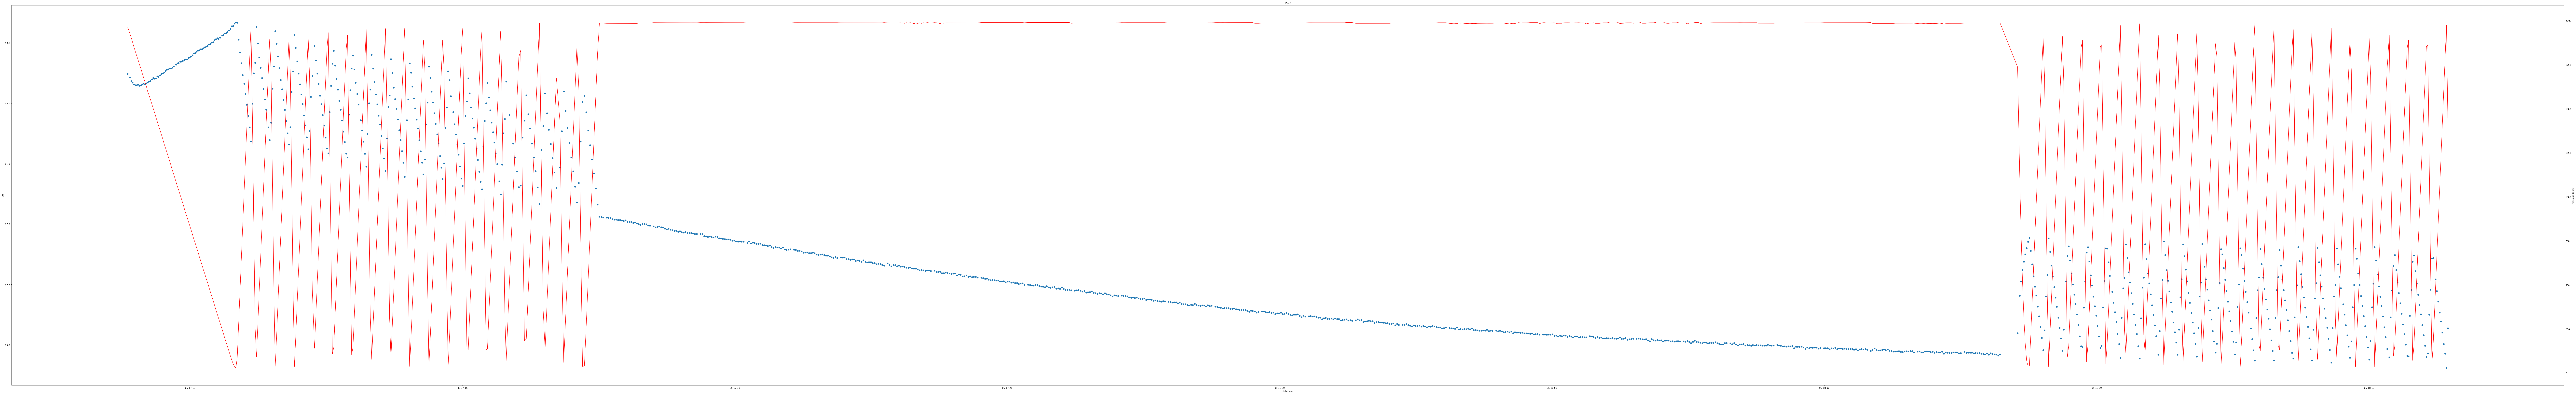

In [86]:


fig, ax = plt.subplots()
fig.set_size_inches(200, 30)
ax.plot_date(time, x)
ax.set_title(SN)
ax.set_xlabel('datetime')
ax.set_ylabel('pH')
ax2 = ax.twinx()
ax2.plot(time, dff['PRES'], color = 'red', linestyle = '-' )
ax2.set_ylabel('Pressure (dbar)')

